# Possible effects of imaging duration on motility
---

#### Overview
The purpose of this notebook is to check for evidence of variation in cell motility over the course of an imaging experiment. I.e. what effects (if any) does time have on swimming behavior? The time scale involved in these experiments is on the order of several minutes.

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

#### Load motility data
Load motility data and set parameters relevant for subsequent regression analysis.

In [2]:
# load csv file of processed motility data from microchamber pools
csv_file = Path("../data/AMID-04_summary_motility_metrics.csv")
motility_dataframe = pd.read_csv(csv_file)

# duration of each time lapse for converting time lapse ID to time
timelapse_duration = 20 / 60  # minutes
# set slide ID
slide_ID = "S1-Cr3-T"
# set metrics for regression analysis
metrics_subset = [
    "mean_curvilinear_speed",
    "confinement_ratio",
    "mean_angular_speed",
]

#### Regression analysis
Generate a scatter plot that shows the variation of each specified motility metric across time. There are often multiple points per moment in time since multiple microchamber pools are present in the field of view of each time lapse.

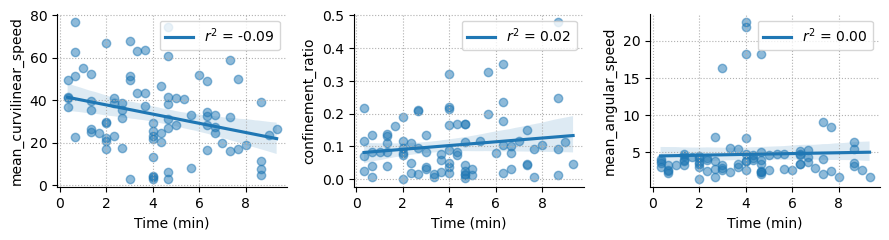

In [3]:
# filter to specified slide ID
source = motility_dataframe.loc[motility_dataframe["slide_ID"] == slide_ID]

# create figure
ncols = len(metrics_subset)
fig, axes = plt.subplots(
    ncols=ncols,
    figsize=(3 * ncols, 2.5),
)

for i, metric in enumerate(metrics_subset):
    # convert time lapse ID to time point
    time_seconds = timelapse_duration * source["timelapse_ID"].values

    # regression stats
    slope, intercept, r_value, p_value, std_err = stats.linregress(time_seconds, source[metric])
    r_squared = np.sign(r_value) * r_value**2

    # scatter plot with regression line
    ax = axes[i]
    g = sns.regplot(
        data=source,
        scatter=True,
        x=time_seconds,
        y=metric,
        line_kws={"label": f"$r^2$ = {r_squared:.2f}"},
        scatter_kws={"alpha": 0.5},
        ax=ax,
    )

    # aesthetics
    ax.set_xlabel("Time (min)")
    ax.grid(ls=":")
    ax.legend(loc=1)
    sns.despine(ax=ax)

plt.tight_layout()